# PHYSICS 121 Lab 1 *RC* Circuits
## The purpose of this notebook
This notebook is provided to help you plot your own experimental data collected in class. You will learn to:

* create a simple scatter plot;
* create a figure with two plots;
* save a figure as a file;
* compute natural logarithms;
* fit linear models to data.

## Import modules
We will use Numpy, Matplotlib, and Scipy for this notebook. Use google to find the up-to-date documentation on each of these modules. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import pandas as pd

## Create a simple scatter plot

Suppose we obtain the dataset below from an experiment. To assess the relationship between $x$ and $y$, we want to create a scatter plot of $x$-values (horizontal axis) against the $y$-values (vertical axis).

$x$ value (unit)  | $y$ value (unit)
------------------:|---------------:
0.0               | 12.0
1.0               | 7.3
2.0               | 4.4
3.0               | 2.5
4.0               | 1.6
5.0               | 1.0
6.0               | 0.6
7.0               | 0.4
8.0               | 0.2

and let's suppose you saved your data in a google docs spreadsheet linked
[here.](https://docs.google.com/spreadsheets/d/1i5z3VpAYL3btennvo_V2wQaZxQXLtxJyVB7lbjmTeZ8)


The module "pandas" can read (google doc) spreadsheets really easily. It places the spreadsheet in what it calls "data frames." in 1 line:

In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1i5z3VpAYL3btennvo_V2wQaZxQXLtxJyVB7lbjmTeZ8/export?format=csv')

The only tricky bit is the very end of the address of the spreadsheet, after the ID of the spreadsheet, where you have to tell pandas explicitly this is a csv file. 

If you want to see what the dataframe df contains, simply:

In [3]:
df

,x-value,y-value
0,0,12.0
1,1,7.3
2,2,4.4
3,3,2.5
4,4,1.6
5,5,1.0
6,6,0.6
7,7,0.4
8,8,0.2


pandas assigned the first row of the spreadsheet as the headers, and pandas even has plotting tools, but that's for another time. We'll stick to your familiar way of plotting  arrays with matplotlib:

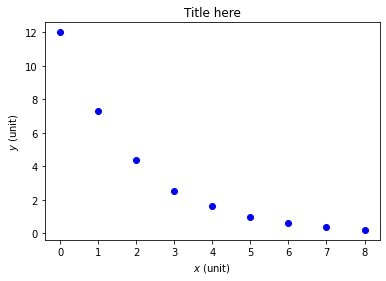

In [4]:
x = df['x-value']
y = df['y-value']

# Plot data with blue circles at the data points (this is what 'bo' does - 'b' stands for blue and 'o' stands for circle)
plt.plot(x, y, 'bo')

# Attach labels and title (using LaTeX syntax)
plt.xlabel('$x$ (unit)')
plt.ylabel('$y$ (unit)')
plt.title('Title here')

# Display the figure
plt.show()

# Create a figure with two plots

Suppose we have a second data set from the same experiment and would like to compare it with the first data set in a scatter plot.

$x$ value (unit)  | $y$ value (unit)
------------------:|---------------:
0.0               | 11.9
1.0               | 9.8
2.0               | 7.9
3.0               | 6.6
4.0               | 5.4
5.0               | 4.4
6.0               | 3.6
7.0               | 3.0
8.0               | 2.4
9.0               | 2.0
10.0              | 1.6
11.0              | 1.3
12.0              | 1.1
13.0              | 0.9
14.0              | 0.7
15.0              | 0.6

If you do not feel comfortable using pandas to link to a spreadsheet, you can of course create an array for the second data set and give these different names:

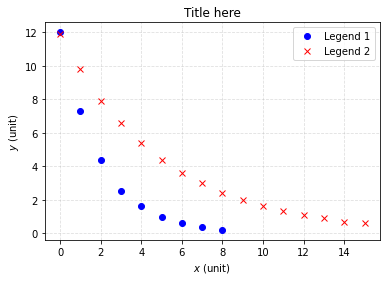

In [5]:
x_new = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0])
y_new = np.array([11.9, 9.8, 7.9, 6.6, 5.4, 4.4, 3.6, 3.0, 2.4, 2.0, 1.6, 1.3, 1.1, 0.9, 0.7, 0.6])

# Create a figure with a specific name 'Test figure' - this will allow us to refer to this particular figure later on.
plt.figure('Test figure')

# Plot the first data set with blue circles ('bo') and the second data set with red crosses ('rx')
# Add legend description for the two data sets
plt.plot(x, y, 'bo', label='Legend 1')
plt.plot(x_new, y_new, 'rx', label='Legend 2')

# Attach labels and title 
plt.xlabel('$x$ (unit)')
plt.ylabel('$y$ (unit)')
plt.title('Title here')

# Show the legend in the plot
plt.legend()

# Show a grid in the plot
plt.grid(alpha=.4,linestyle='--')

# To save the figure as a file:
plt.savefig('MyFigure.png')
# Display the figure
plt.show()

# Compute natural logarithms

Suppose we work out the relationship between $x$ and $y$ is an exponential one in our analysis, we can compute the values of $\ln(y)$ to linearise the data and plot $x$ vs $\ln{(y)}$. We will use the first dataset as an example below.

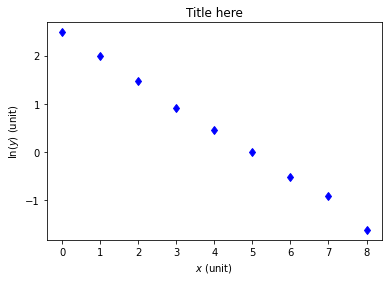

In [6]:
# Take the natural logarithm of y (this is what 'np.log(y)' does).
# Plot data with blue diamond markers at the data points (this is what 'bd' does)
plt.figure()
plt.plot(x, np.log(y), 'bd') 

# Attach labels and title 
plt.xlabel('$x$ (unit)')
plt.ylabel('$\ln(y)$ (unit)')
plt.title('Title here')

# Display the figure
plt.show()

# Fit linear models to data

We can find the line of best fit by using linear regression. Luckily, a function to do a linear regression is built into the "stats" module:

In [7]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, np.log(y))

The five arguments are assigned the values that fit the line the best. Next, we can use the slope, intercept and the array with x-values to define an array with points on this line:

In [8]:
line = slope*x + intercept

Now we can plot the line of best fit in cyan and x vs ln(y) with blue diamonds, for example. Note the fancy way plot the parameters of the best fitting line in the legend:

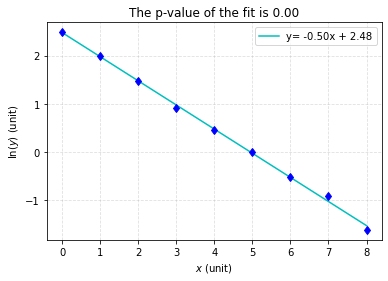

In [9]:
plt.plot(x, line, 'c', label=f'y= {slope:.2f}x + {intercept:.2f}')
plt.plot(x, np.log(y),'bd')

# Attach labels and title
plt.xlabel('$x$ (unit)')
plt.ylabel('$\ln(y)$ (unit)')
plt.title(f'The p-value of the fit is {p_value:.2f}')

# Add a grid to the plot
plt.grid(alpha=.4,linestyle='--')

# Show the legend in the plot
plt.legend()

# Display the figure
plt.show()